In [1]:
import pandas as pd

Note: This zip seems to have been removed from examples. Maybe someone's accidently deleted it? I've added it back in.

In [3]:
df = pd.read_csv('../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [4]:
df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### 1. Using the EFIplus_medit.zip dataset, test if the frequency of sites with presence and absence of Salmo trutta fario (Brown Trout) are independent from the country. Please state which is/are the null hypothesis of your test(s). You may try to produce an alluvial plot.

First check for values other than 0 and 1 in Salmo trutta fario

In [6]:
# Check for values other than 0 and 1 in the 'Salmo trutta fario' column
values = df['Salmo trutta fario'].unique()
print(f"Unique values in 'Salmo trutta fario' column: {values}")


Unique values in 'Salmo trutta fario' column: [0 1]


Check the country column for nulls

In [7]:
df["Country"].isnull().sum()

np.int64(0)

The null hypothesis is that the presence of brown trout is independent from the country. i.e. there is no correlation between country and brown trout presence.
First let's visualise brown trout's presence in each country.

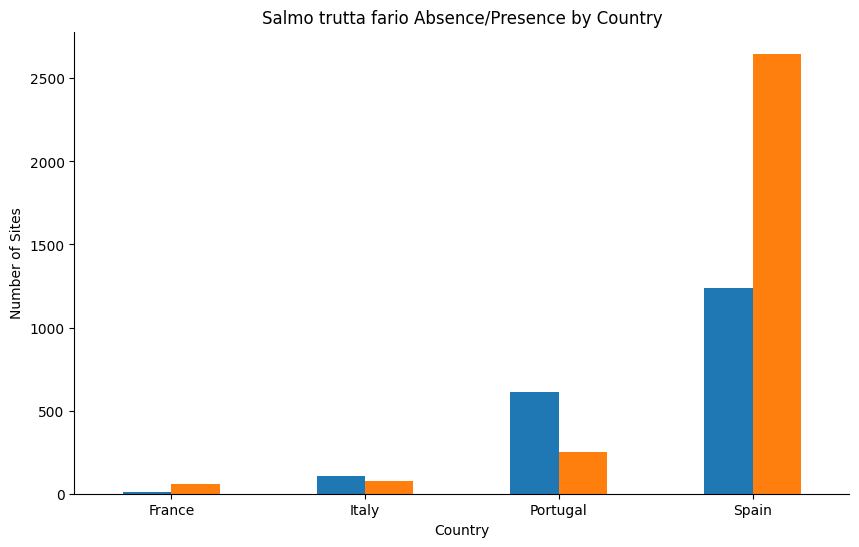

In [22]:
import matplotlib.pyplot as plt

# Group data by country and Salmo trutta fario presence
country_counts = df.groupby(['Country', 'Salmo trutta fario']).size().unstack(fill_value=0)

# Create the plot
country_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Salmo trutta fario Absence/Presence by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sites')
plt.xticks(rotation=0, ha='center')
plt.legend('',frameon=False)
# remove frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.tight_layout()
plt.show()


They look different, but it also looks like there are many more datapoints for some countries than others. Let's divide the values by how many datapoints each has to make it easier to compare.

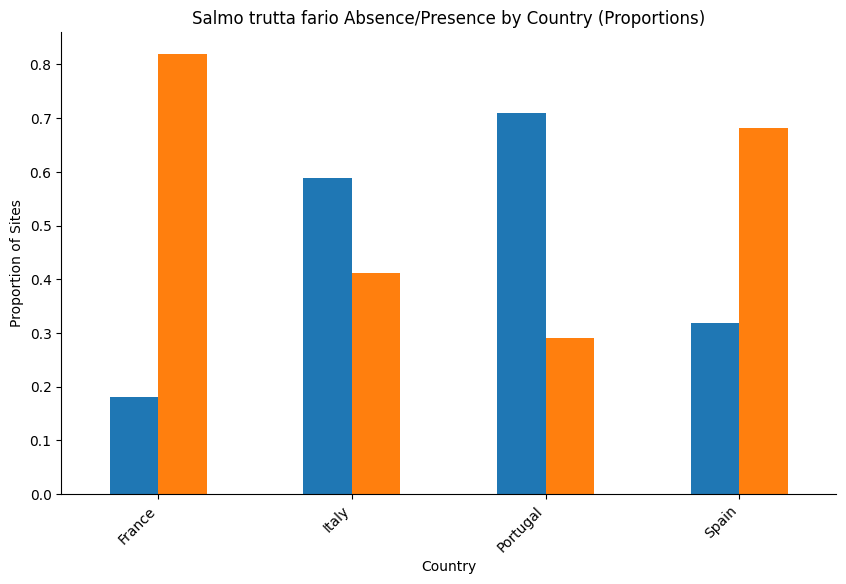

In [12]:
# Calculate the total count for each country
country_totals = country_counts.sum(axis=1)

# Divide each country's count of 0 and 1 by the total count for that country
country_proportions = country_counts.div(country_totals, axis=0)

# Create the plot
country_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Salmo trutta fario Absence/Presence by Country (Proportions)')
plt.xlabel('Country')
plt.ylabel('Proportion of Sites')
plt.xticks(rotation=45, ha='right')
plt.legend('',frameon=False)
# remove frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


Let's also visualise this as an alluvial plot

In [31]:
country_counts

Salmo trutta fario,0,1
Country,,
France,13,59
Italy,109,76
Portugal,615,252
Spain,1239,2648


In [69]:
# Create a new DataFrame with only 'Country' and 'Salmo trutta fario' columns
trout_df = df[['Country', 'Salmo trutta fario']].copy()
print(trout_df.head())


  Country  Salmo trutta fario
0   Spain                   0
1   Spain                   1
2   Spain                   1
3   Spain                   1
4   Spain                   1


In [73]:
import plotly.express as px

fig = px.parallel_categories(trout_df)
fig.show()

Using the proportioned values, let's test if any are statistically different

In [8]:
from scipy.stats import chi2_contingency

# Create a contingency table from the country_counts DataFrame
contingency_table = country_counts

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

alpha = 0.05  # Set the significance level

if p < alpha:
    print("The proportions are significantly different between countries (reject null hypothesis).")
else:
    print("The proportions are not significantly different between countries (fail to reject null hypothesis).")


Chi-squared statistic: 496.3723854072799
P-value: 2.9162328651936495e-107
Degrees of freedom: 3
Expected frequencies:
[[  28.39193774   43.60806226]
 [  72.95150669  112.04849331]
 [ 341.88625025  525.11374975]
 [1532.77030533 2354.22969467]]
The proportions are significantly different between countries (reject null hypothesis).


The null hypothesis was that the proportions of brown trout are not significantly different between the four countries. This was rejected, as the p value is much lower than 0.05 (~2.9e-107)

### 2. Run the non-parametric equivalent of the test you used in exercise 5.3 and compare with the ANOVA test (5.2: Test whether there are differences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s))

I used a one way ANOVA for 5.3. From searching online I found that the Kruskal-Wallis ANOVA is the non-parametric equivelant. The null hypothesis is that the distribution of the  sites is not significantly different at an alpha of 0.05.

In [14]:
df["Elevation_mean_catch"].isnull().sum()

np.int64(170)

In [34]:
# Drop rows with null values in 'Elevation_mean_catch' column
df = df.dropna(subset=['Elevation_mean_catch'])


In [35]:
# Count the occurrences of each catchment
catchment_counts = df['Catchment_name'].value_counts()

# Get the top 8 most sampled catchments
top_8_catchments = catchment_counts.nlargest(8).index

# Create a new DataFrame with only the top 8 catchments
top_8_df = df[df['Catchment_name'].isin(top_8_catchments)]

top_8_df.head(5)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from scipy.stats import kruskal

groups = [top_8_df['Elevation_mean_catch'][top_8_df['Catchment_name'] == name] for name in top_8_catchments]

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

print(f"Kruskal-Wallis statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("The distributions of proportions are significantly different between catchments (reject null hypothesis).")
else:
    print("The distributions of proportions are not significantly different between catchments (fail to reject null hypothesis).")


Kruskal-Wallis statistic: 1335.3732750709976
P-value: 3.7056116510329714e-284
The distributions of proportions are significantly different between catchments (reject null hypothesis).


The p-value is very close to zero, so we can reject the null hypothesis, as this is less than the p-value of 0.05. For this reason we can conclude that the distributions of elevation_mean_catch are different between the top 8 sites. This does not give information on which specific sites are significantly different from one another, whereas the ANOVA test in 5.3 did show this. The Mann-Whitney U test can show this, but it's less simple to run than the ANOVA, as it only compares two cathcments at each analysis, so it needs loops to run all of the catchments.

In [39]:
from scipy.stats import mannwhitneyu

# Perform pairwise Mann-Whitney U tests
alpha = 0.05
significant_pairs = []
insignificant_pairs = []
for i in range(len(top_8_catchments)):
    for j in range(i + 1, len(top_8_catchments)):
        catchment1 = top_8_catchments[i]
        catchment2 = top_8_catchments[j]
        group1 = top_8_df['Elevation_mean_catch'][top_8_df['Catchment_name'] == catchment1]
        group2 = top_8_df['Elevation_mean_catch'][top_8_df['Catchment_name'] == catchment2]
        statistic, p_value = mannwhitneyu(group1, group2)
        if p_value < alpha:
            significant_pairs.append((catchment1, catchment2, p_value))
        else:
            insignificant_pairs.append((catchment1, catchment2, p_value))

# Print the significant pairs
print("Significant pairs of catchments (Mann-Whitney U test):")
for pair in significant_pairs:
    print(f"  - {pair[0]} vs {pair[1]}: p-value = {pair[2]}")
print('insignificant pairs of catchments: ')
print(insignificant_pairs)


Significant pairs of catchments (Mann-Whitney U test):
  - Ebro vs Galiza-Norte: p-value = 2.0054316463250486e-187
  - Ebro vs Minho: p-value = 3.827688230291857e-09
  - Ebro vs Tejo: p-value = 4.841256934286194e-22
  - Ebro vs Cantabrica: p-value = 2.377300122581208e-69
  - Ebro vs Douro: p-value = 6.793817809299521e-08
  - Ebro vs Guadia: p-value = 3.0751817609451104e-111
  - Ebro vs Catala: p-value = 1.3238304762595638e-34
  - Galiza-Norte vs Minho: p-value = 4.718136373263862e-124
  - Galiza-Norte vs Tejo: p-value = 7.533883454040416e-36
  - Galiza-Norte vs Cantabrica: p-value = 1.5936431934693667e-15
  - Galiza-Norte vs Douro: p-value = 2.821833069701499e-117
  - Galiza-Norte vs Catala: p-value = 4.917161485858885e-21
  - Minho vs Tejo: p-value = 3.2072746502447382e-06
  - Minho vs Cantabrica: p-value = 1.385860438761601e-37
  - Minho vs Guadia: p-value = 8.691735151725661e-72
  - Minho vs Catala: p-value = 3.605713877884534e-15
  - Tejo vs Cantabrica: p-value = 8.05095416112305e-

From this, it can be seen that only two catchments do not reject the null hyothesis that the distributions of Elevation_mean_catch are the same between each pair of catchments: Galiza-Norte and Guadia, and Minho and Douro. More investigation would need to be done to suggest a reason for this. As it is related to the mean elevation in the upstream catchment, we might assume that the diversity of elevation in upstream catchments is quite high across these four countries.

Checking which countries the insignificant catchments are in. Further understanding of the rivers is needed to understand the results above in the real world.

In [42]:
catchments = ['Galiza-Norte', 'Guadia', 'Minho', 'Douro']
for catchment in catchments:
  countries = df.loc[df['Catchment_name'] == catchment, 'Country'].unique()
  print(f"Catchment: {catchment}, Countries: {countries}")


Catchment: Galiza-Norte, Countries: ['Spain']
Catchment: Guadia, Countries: ['Spain' 'Portugal']
Catchment: Minho, Countries: ['Spain' 'Portugal']
Catchment: Douro, Countries: ['Spain' 'Portugal']


## Using the winequality_red.csv file in the examples folder of the github repository, test which wine parameters discriminate the best between wine quality scores categorized into two classes using value 5 as the threshold value (quality>5=“good” and quality<5=“bad”).

In [5]:
df_wine = pd.read_csv('../../examples/winequality_red.csv')
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Decide on the decision variable.

In [5]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Quality is the value we're trying to predict. The other eleven variables will be analysed to decide if they contribute to a wine's quality score or not.
As the question asks for >5, or <5, but no = 5, =5 will be grouped with 'bad' quality. So if quality is >5, it will be 'good', if it is <=5 it will be 'bad'.

First, let's visualise the variables with a heatmap, which uses Pearson correlation to calculate the correlations between the different variables. We are most interested in the correlation between quality and each decision variable.

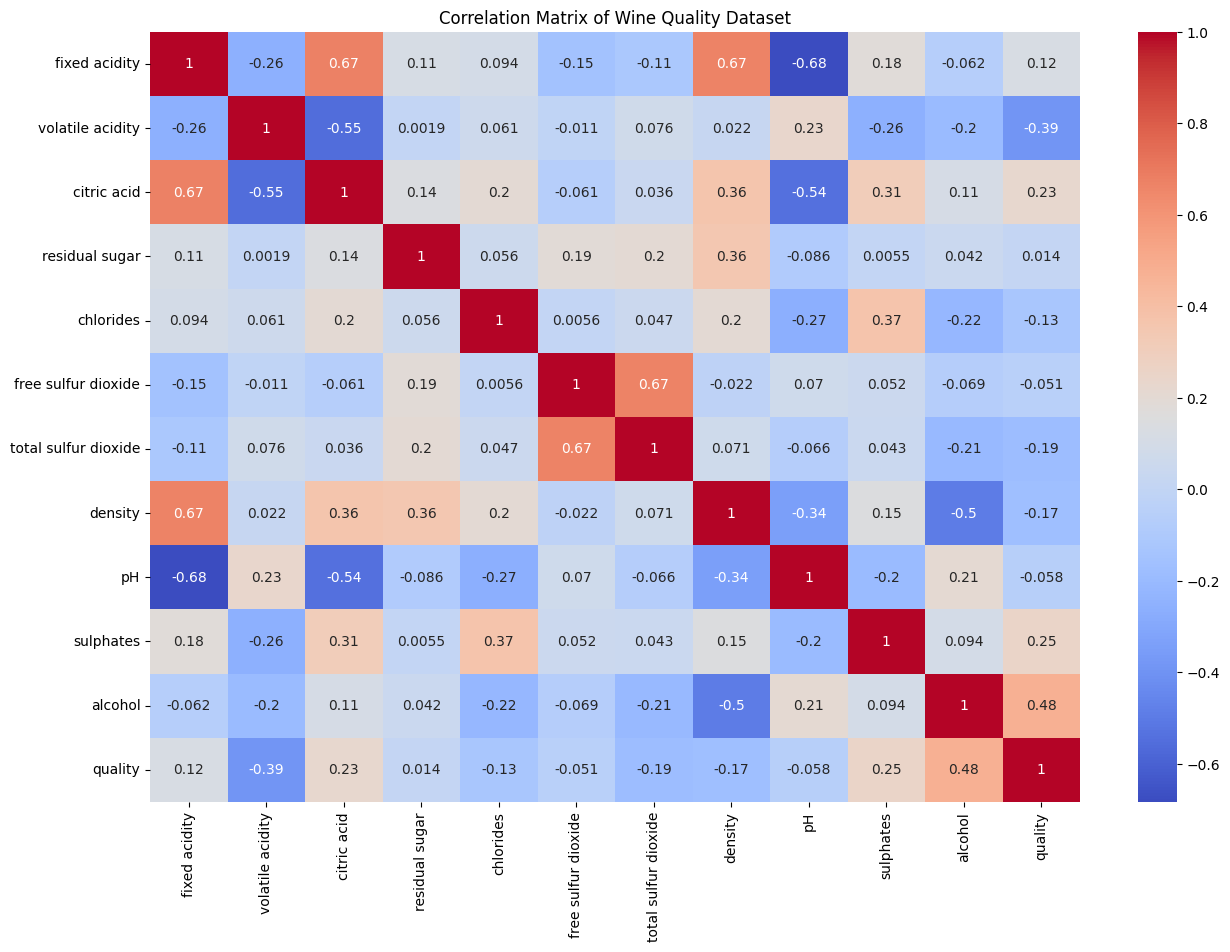

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

Looking at overall quality, it can be seen that alcohol, volatile acidity, sulphates, and citric acid have the highest correlation, and then total sulfur dioxide and density. We are only interested if it is good (quality>5), or bad (quality<=5) though, so let's break this dataset up into good and bad. To create the graph, it is easier to use the binaries 0 and 1 to indicate good (0) and bad (1)

In [28]:
df_good_bad = df_wine.copy()
df_good_bad['quality'] = df_good_bad['quality'].apply(lambda x: 0 if x > 5 else 1)
df_good_bad.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


Now let's create a new visual showing the correlation with quality_gb. The previous visual is fine, because the quality column was replaced with 'good' or 'bad'. So that visual can be used with the new dataset.

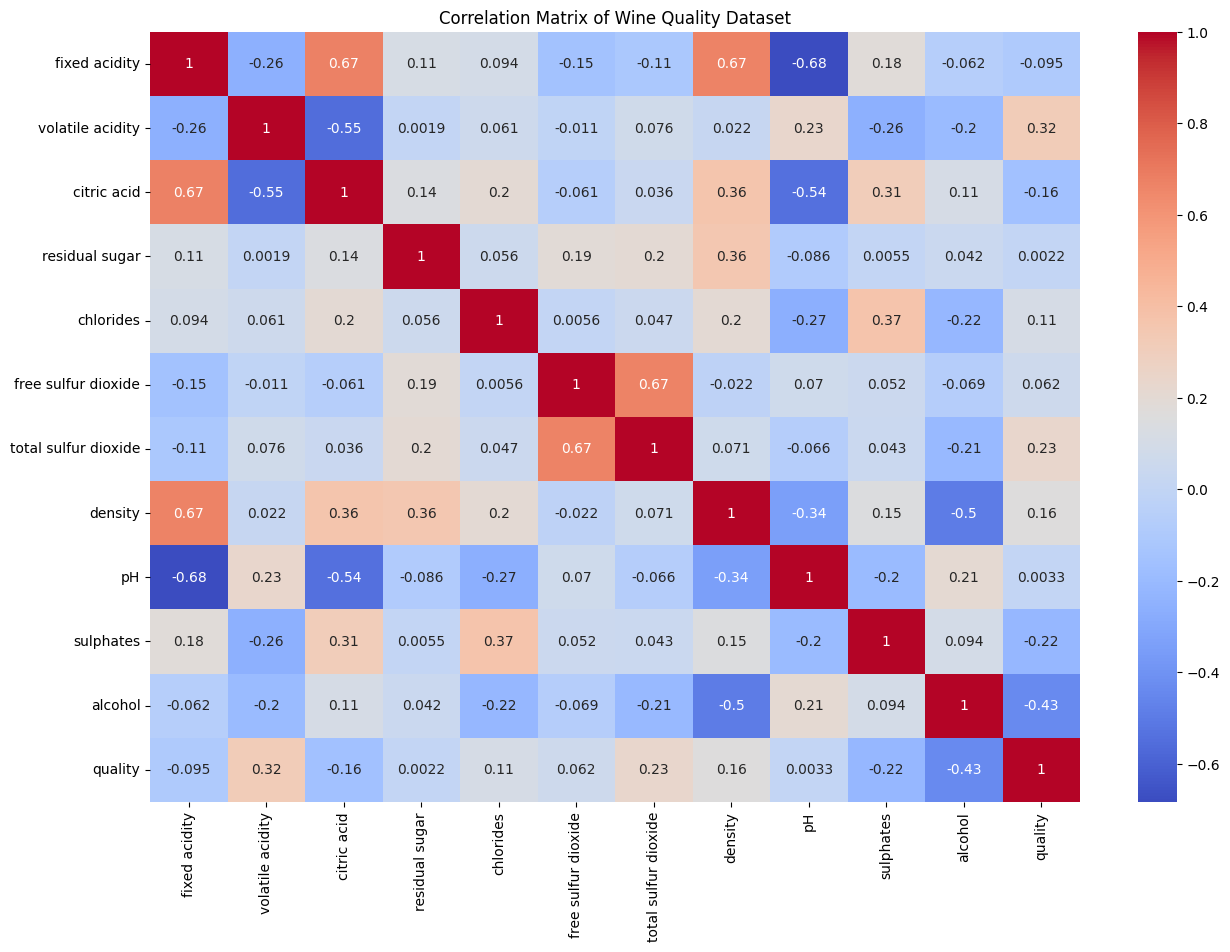

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_good_bad.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

It looks like the strongest correlation is still with alcohol, volatile acidity, sulphates and citric acid, howevever now total sulfur dioxide is a more important variable than in the prevous graph, and citric acid is less correlated. We can conclude that the least useful variables are pH, free sulfur dioxide, residual sugar, and fixed acidity.
This heat map also shows the correlations between different variables. It shows some quite strong relationships, such as between pH and fixed acidity (-0.68).